In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
#git fetch upstream
#git merge upstream/master

In [3]:
#
path = r'/home/omar/myproj/corona/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
#
mexico = frame['Country_Region'] == 'Mexico'
#puebla = frame['Province_State'] == 'Puebla'
frame['time'] = pd.to_datetime(frame['Last_Update'])
#frame.sort_values(by=['time'])

#frame['time_passed'] = (dt.datetime.now() - frame['time']).dt.days
frame['time_passed'] = frame['time']

#Get current datetime
#dt.datetime.now()
#print(np.sum(mexico), np.sum(puebla))


In [34]:
#
def show_all(frame=None, states_list=None, compare=None, new_per_day=False, cases=None):
    
    fig = plt.figure(figsize=(24,5*32))
    frame = frame.sort_values(by=['time'])
    
    if states_list is None: states_list = list(set(frame['Province_State'][mexico]))

    for num, i in enumerate(states_list):

        if i is np.nan: continue

        plt.subplot(32,3, num+1)

        state = i
        mask = frame['Province_State'] == state

        plt.title(state, size=18)
        colors = ['blue', 'green', 'orange', 'red']
        if compare is None: cases = ['Confirmed', 'Active', 'Recovered', 'Deaths']
        
        for num2, case in enumerate(cases):
            
            time1 = frame['time_passed'][mask].dt.strftime('%m-%d')
            
            if compare is not None:
                
                mask2 = frame['Province_State'] == compare
                time2 = frame['time_passed'][mask2].dt.strftime('%m-%d')
                
                if new_per_day: 
                    plt.plot(time1, frame[case][mask] - frame[case][mask].shift(1), marker='*', alpha=0.3, c=colors[num2])
                    plt.plot(time2, frame[case][mask2] - frame[case][mask2].shift(1), marker='*', ls='--', c=colors[num2])
                    
                else: 
                    plt.plot(time1, frame[case][mask], marker='*', alpha=0.3, c=colors[num2])
                    plt.plot(time2, frame[case][mask2], marker='*', ls='--', c=colors[num2])
                
            else:
                
                if new_per_day: plt.plot(time1, frame[case][mask] - frame[case][mask].shift(1), marker='*', label=case)
                else: plt.plot(time1, frame[case][mask], marker='*', label=case)
                    
            plt.xticks(time1[::5])

        #plt.xlabel(r'days since first case', size=20)
        #plt.ylabel(r'cases', size=20)
        #plt.gca().invert_xaxis()
        if compare is None: plt.legend()
        plt.grid()
    

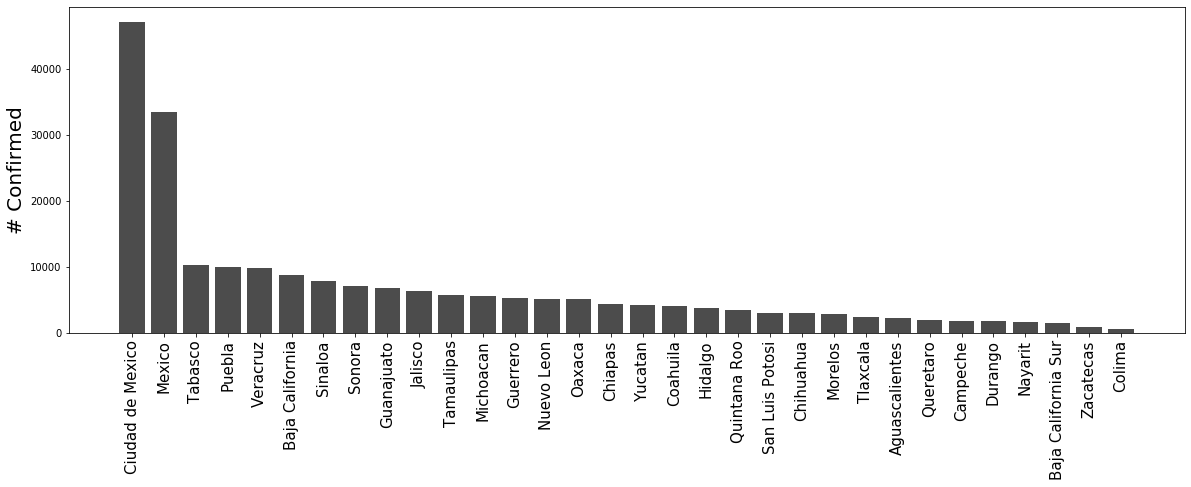

In [27]:
#

data = []
for i in list(set(frame['Province_State'][mexico])):
    if i is np.nan: continue
    mask = (frame['Province_State'] == i)
    
    #print(i, np.max(frame['Confirmed'][mask]))
    data.append([i, np.max(frame['Confirmed'][mask])])
    
df = pd.DataFrame(data, columns = ['state', 'confirmed']) 
df = df.sort_values(by=['confirmed'],ascending=False)

plt.figure(figsize=(20,6))
plt.bar(df['state'], df['confirmed'], color='k', alpha=0.7)
plt.xticks(rotation='vertical', size=15)
plt.ylabel(r'# Confirmed', size=20)
plt.show()
    

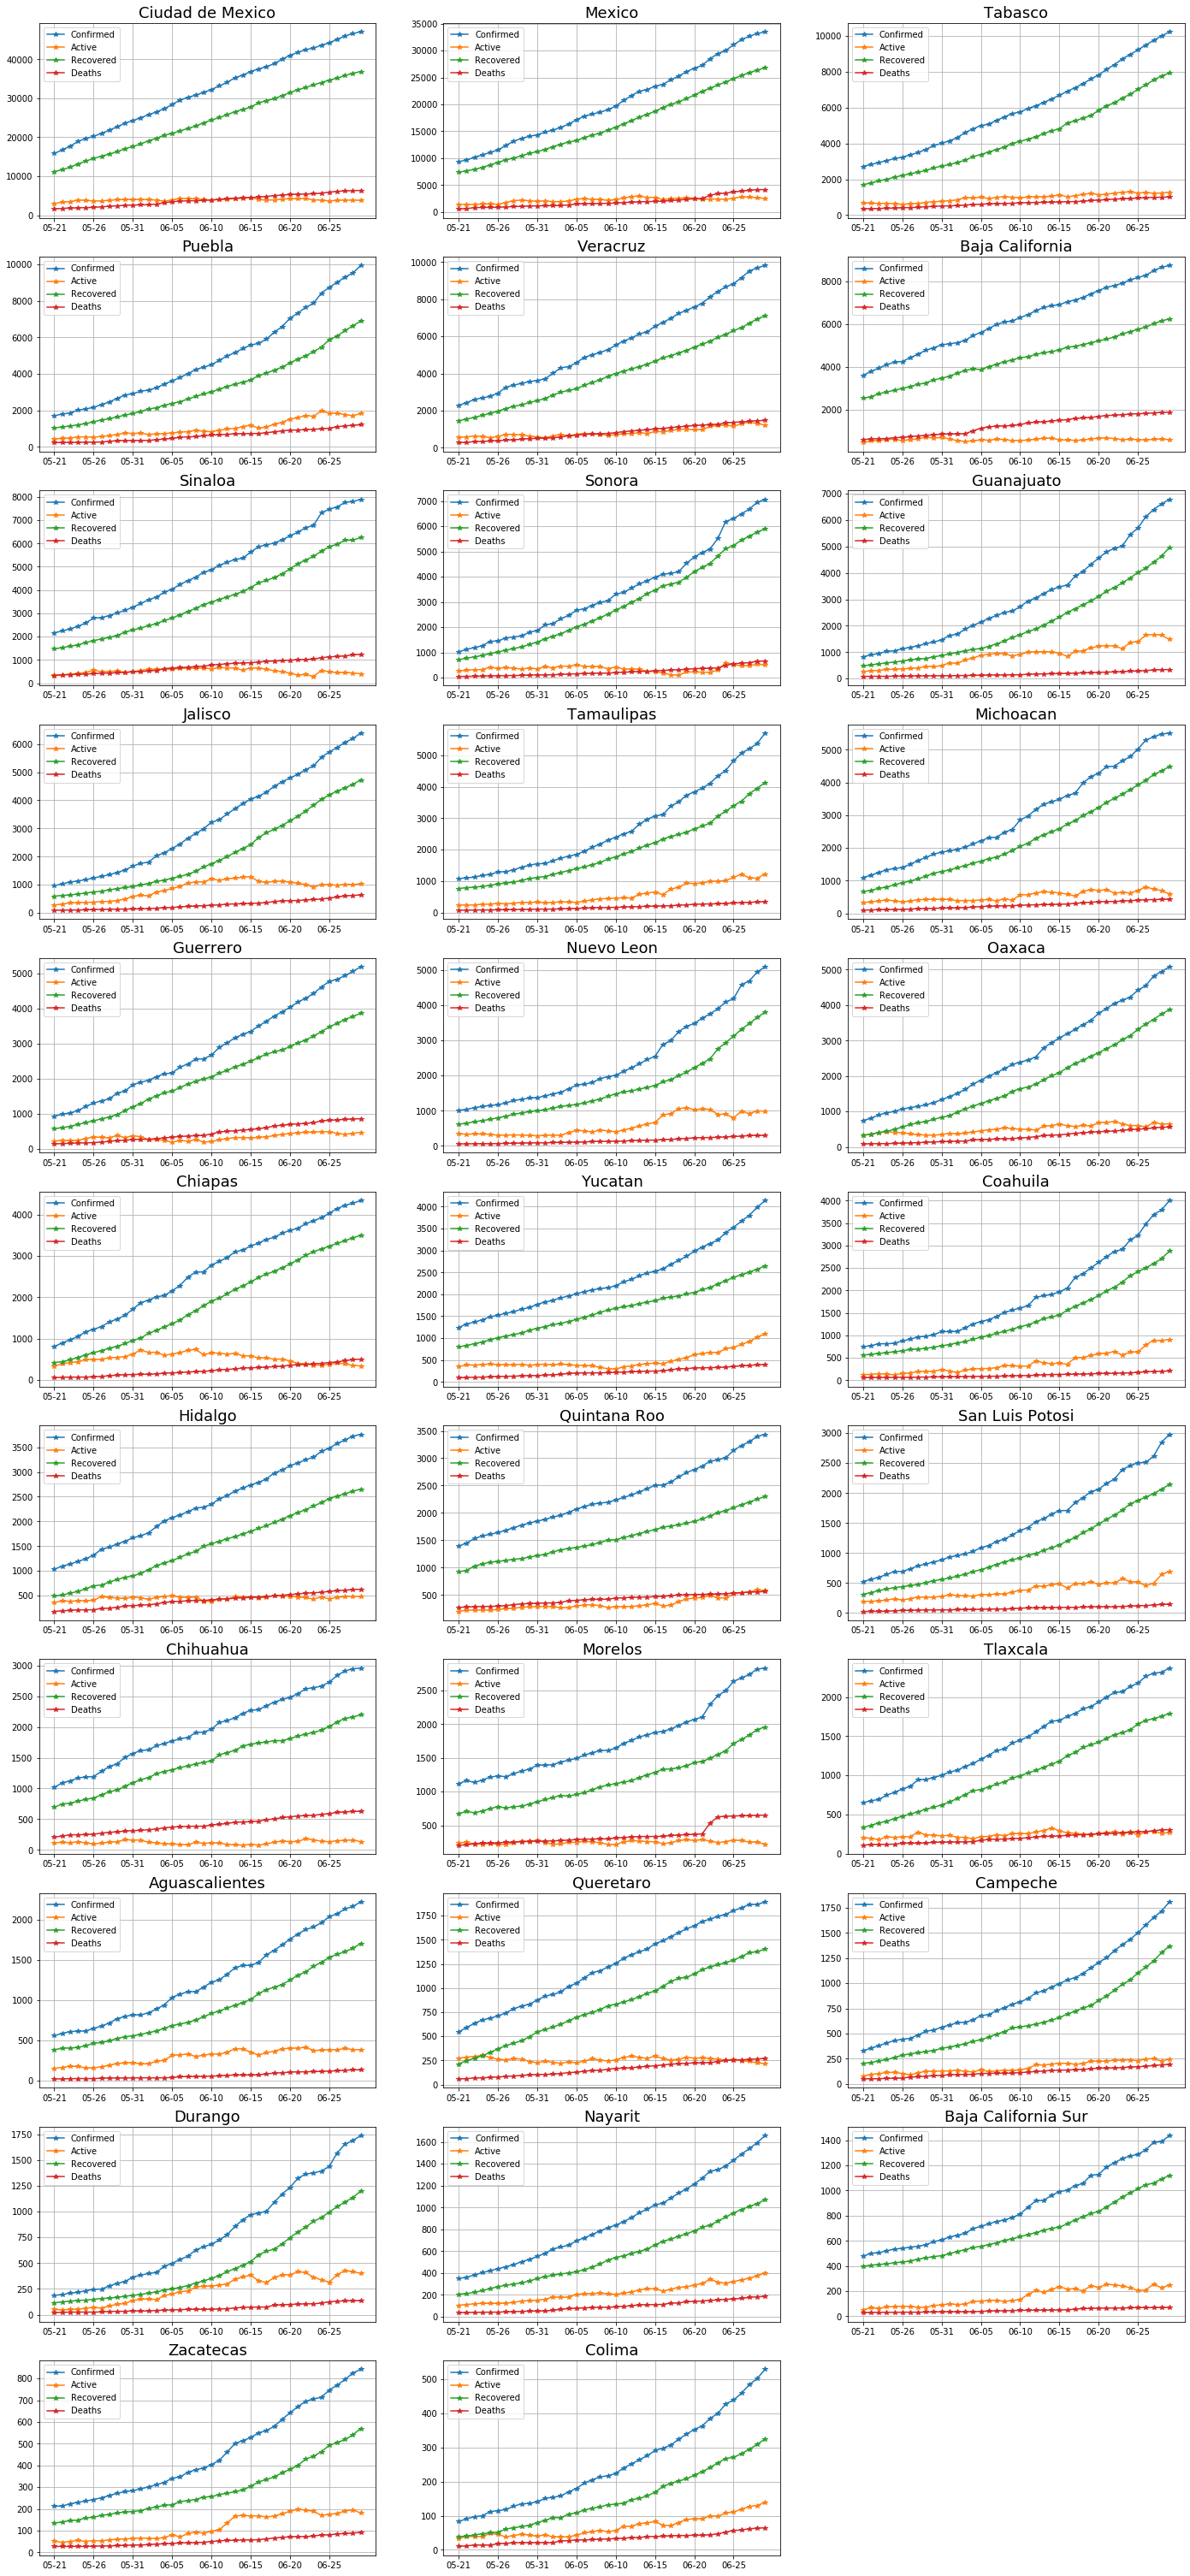

In [35]:
show_all(frame=frame, states_list=list(df['state']), compare=None, new_per_day=False)

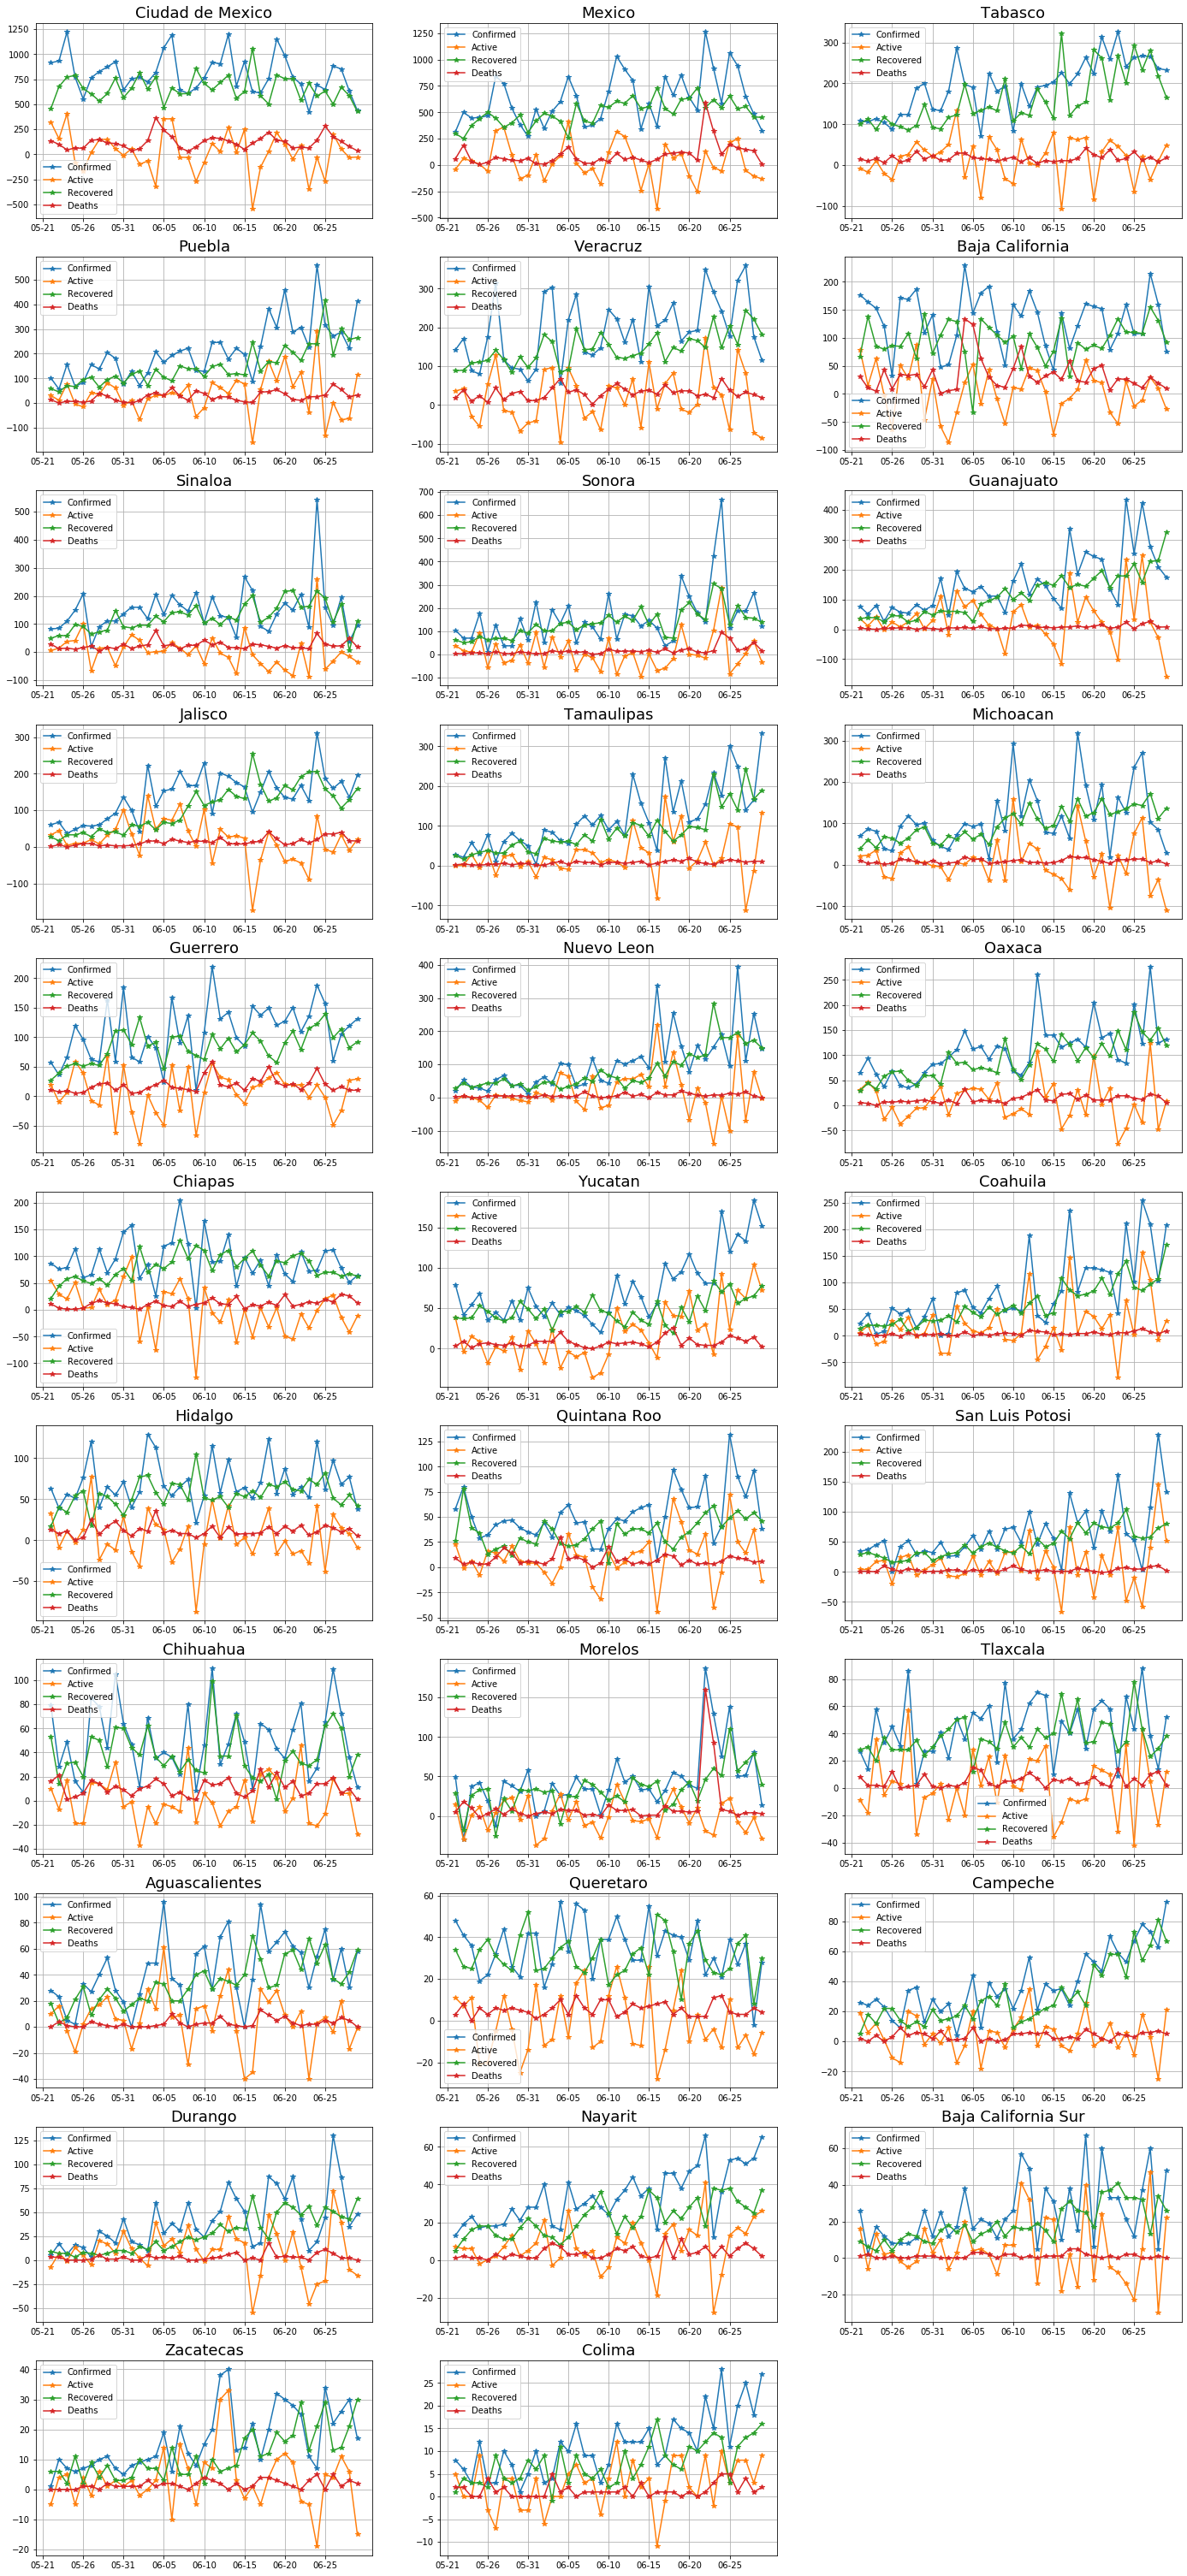

In [36]:
show_all(frame=frame, states_list=list(df['state']), compare=None, new_per_day=True)

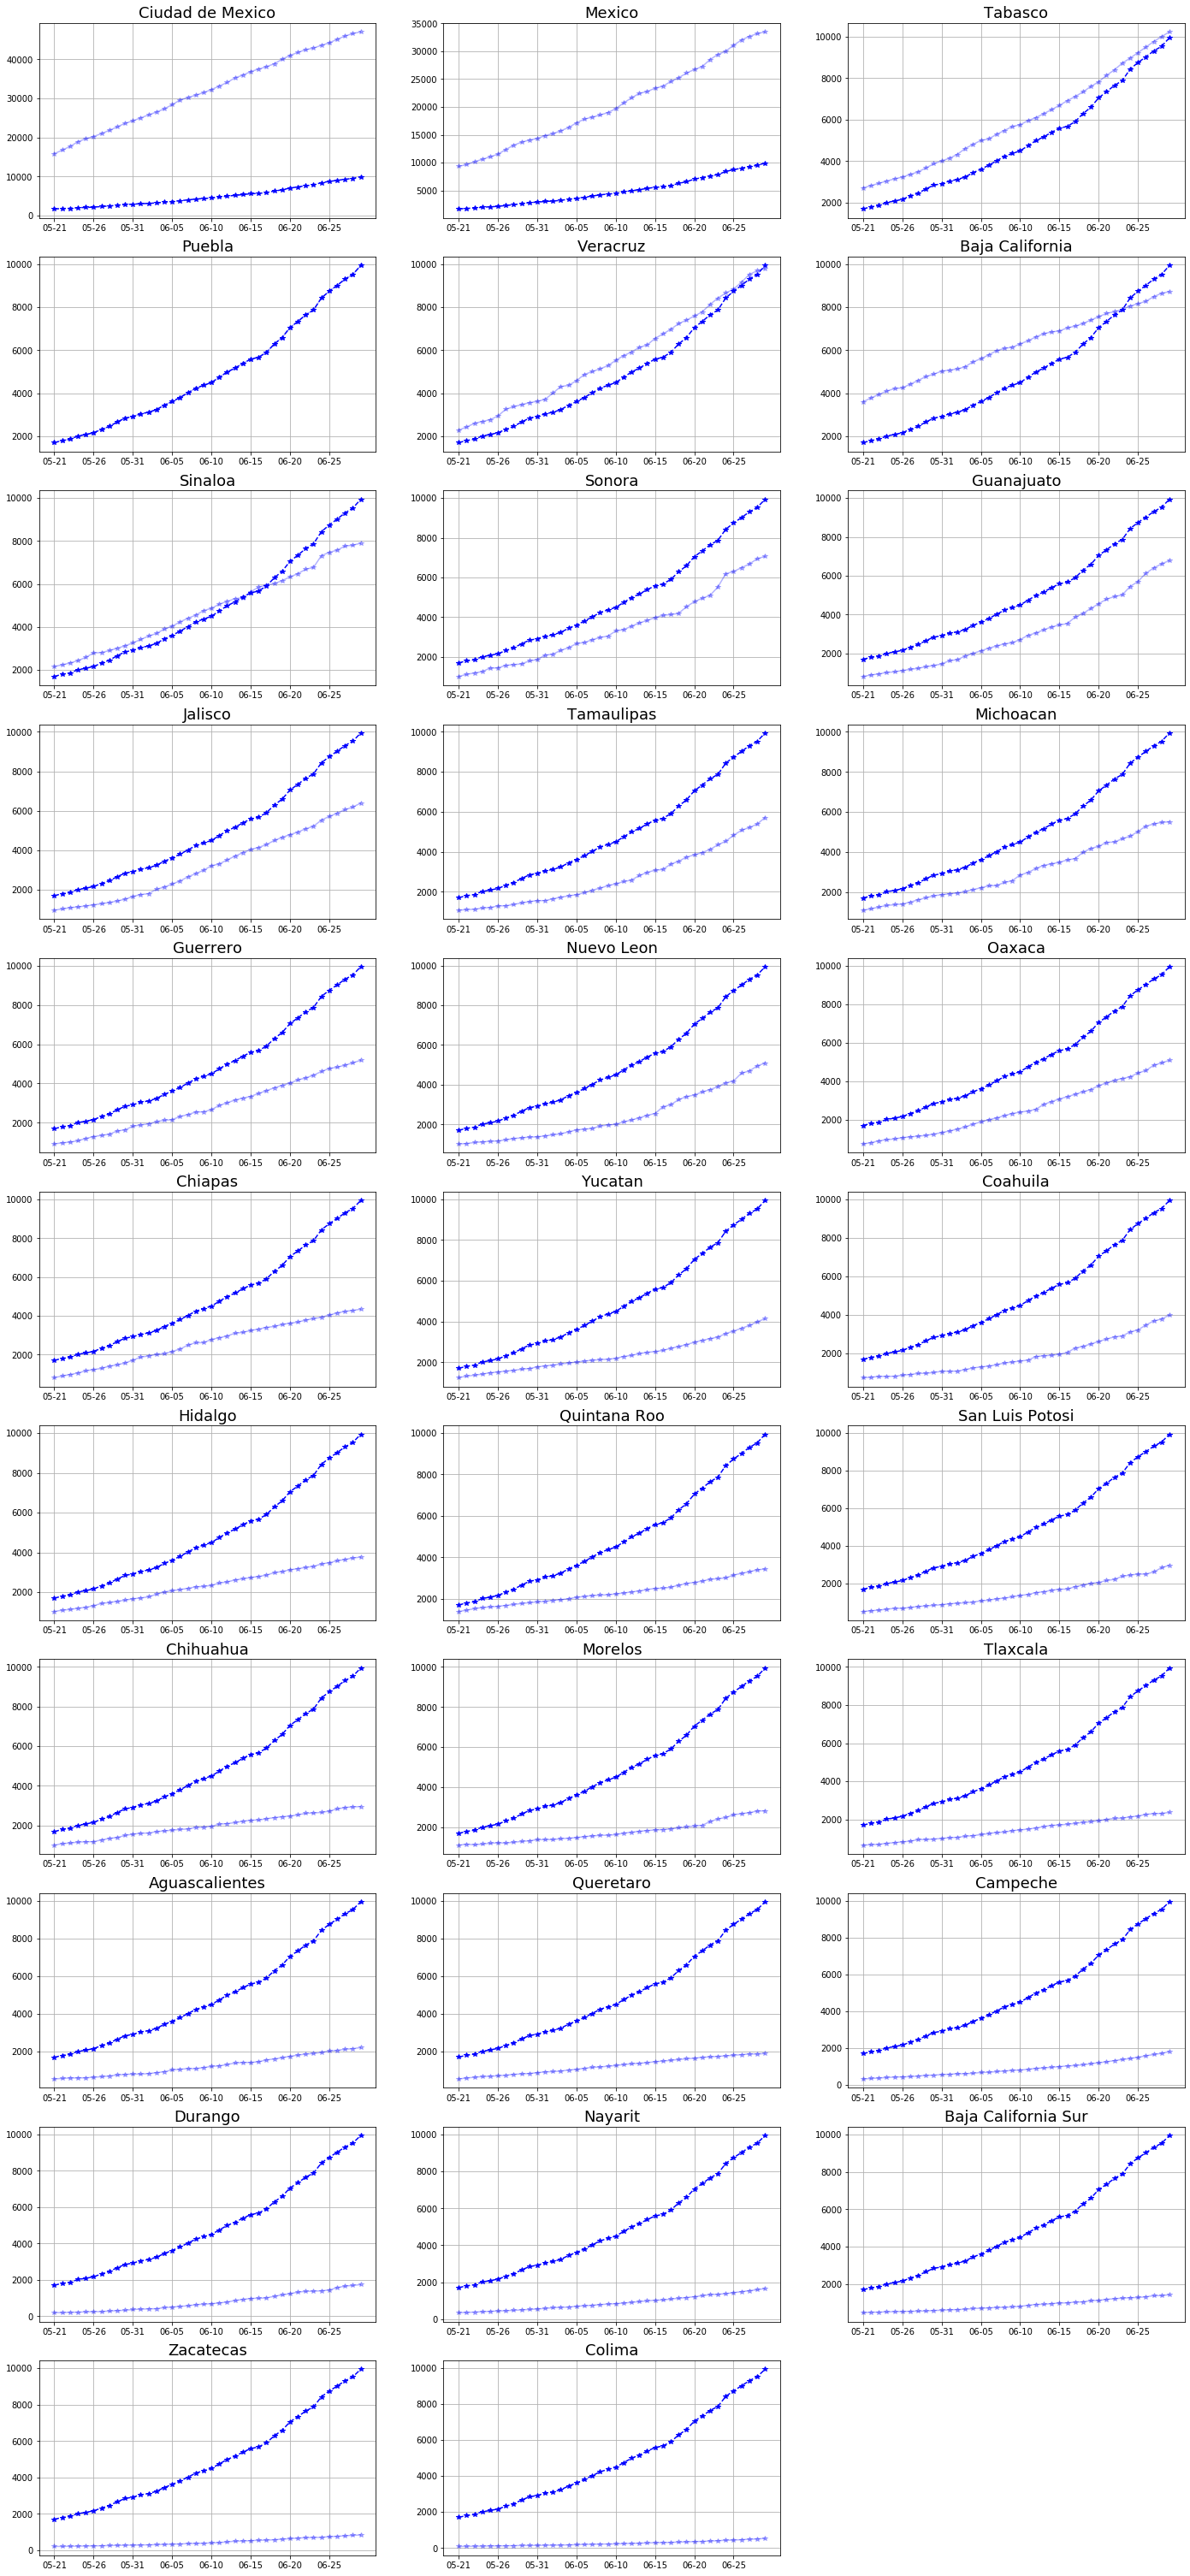

In [37]:
show_all(frame=frame, states_list=list(df['state']), compare='Puebla', new_per_day=False, cases=['Confirmed'])